<a href="https://colab.research.google.com/github/Jayasvisajja/ANPR-Automatic-Number-Plate-Recognition-/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatic Number Plate Recognition (ANPR) system**

## **Automatic License Plate Recognition (ALPR) Overview**

### What is ALPR?
ALPR (Automatic License Plate Recognition) is a computer vision technology used to detect and recognize vehicle number plates from images or videos.
It combines Object Detection (plate localization) and Optical Character Recognition (OCR) (plate text extraction).








### ALPR Pipeline

*  Image Acquisition – Input via camera, video, or dataset.
*  License Plate Detection – Identify plate region using YOLO, SSD, or OpenCV.

*  Character Recognition (OCR) – Extract text using Tesseract or EasyOCR.
*  Post-processing – Remove noise and format text.

*  Data Storage – Store extracted data for analysis or vehicle tracking.





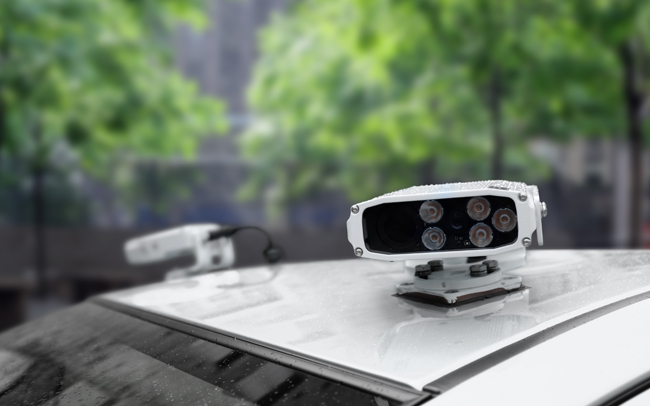

## **Dataset Description**




*  Dataset Name: Number Plate Detection (aslanahmedov/number-plate-detection)
* Source: Kaggle

*  Content:
       Images of vehicles with visible number plates
       Annotations in CSV format containing bounding box coordinates & plate text
       Various lighting conditions and angles for robustness


*   Data Format:
      Images: JPG/PNG
      Annotations: CSV/XML with x_min, y_min, x_max, y_max, plate_number









## **Install and import Dependencies**

In [1]:
# Install required libraries
!pip install opencv-python-headless
!pip install numpy
!pip install tensorflow
!pip install matplotlib


In [2]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
import os
import zipfile

# Create a directory to store the dataset
os.makedirs('dataset', exist_ok=True)

# Download the dataset using curl
!curl -L -o dataset/indian-vehicle-dataset.zip https://www.kaggle.com/api/v1/datasets/download/saisirishan/indian-vehicle-dataset

# Extract the dataset
with zipfile.ZipFile('dataset/indian-vehicle-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  178M  100  178M    0     0  69.3M      0  0:00:02  0:00:02 --:--:-- 87.7M


In [7]:
!ls dataset


google_images  indian-vehicle-dataset.zip  State-wise_OLX  video_images


In [8]:
import zipfile

# Extract the dataset
with zipfile.ZipFile('dataset/indian-vehicle-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# List the extracted files and folders
!ls dataset


google_images  indian-vehicle-dataset.zip  State-wise_OLX  video_images


In [9]:
import os
import cv2
import numpy as np

# Define the paths to the directories
dirs = ['dataset/google_images', 'dataset/State-wise_OLX', 'dataset/video_images']

# Function to load images and labels
def load_dataset(dirs):
    images = []
    labels = []
    for dir in dirs:
        for filename in os.listdir(dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                # Load the image
                image = cv2.imread(os.path.join(dir, filename))
                # Resize the image to a fixed size (e.g., 224x224)
                image = cv2.resize(image, (224, 224))
                # Append the image and label to the lists
                images.append(image)
                # Example: Assuming the label is in the filename (e.g., "car_1234.jpg")
                label = filename.split('_')[0]
                labels.append(label)
    return np.array(images), np.array(labels)

# Load the dataset
images, labels = load_dataset(dirs)

# Check the shape of the loaded data
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (789, 224, 224, 3)
Labels shape: (789,)


In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Normalize the images
images = images.astype('float32') / 255.0

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

# Check the shape of the processed data
print("Normalized images shape:", images.shape)
print("One-hot encoded labels shape:", labels.shape)


Normalized images shape: (789, 224, 224, 3)
One-hot encoded labels shape: (789, 145)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(145, activation='softmax'))  # Adjust output layer size based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 145)                 │          37,265 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,281,937 (85.00 MB)

 Trainable params: 22,281,937 (85.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 523ms/step - accuracy: 0.1371 - loss: 4.2550 - val_accuracy: 0.3101 - val_loss: 2.5494
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1869 - loss: 3.3551 - val_accuracy: 0.3291 - val_loss: 2.1491
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.2292 - loss: 2.9071 - val_accuracy: 0.4620 - val_loss: 2.0161
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3035 - loss: 2.6596 - val_accuracy: 0.4494 - val_loss: 1.9734
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4231 - loss: 2.1278 - val_accuracy: 0.5000 - val_loss: 1.6892
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5957 - loss: 1.6195 - val_accuracy: 0.5506 - val_loss: 1.5277
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6557 - loss: 1.3301 - val_accuracy: 0.5063 - val_loss: 1.7858
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7683 - loss: 0.9116 - val_accuracy: 0.5506 -

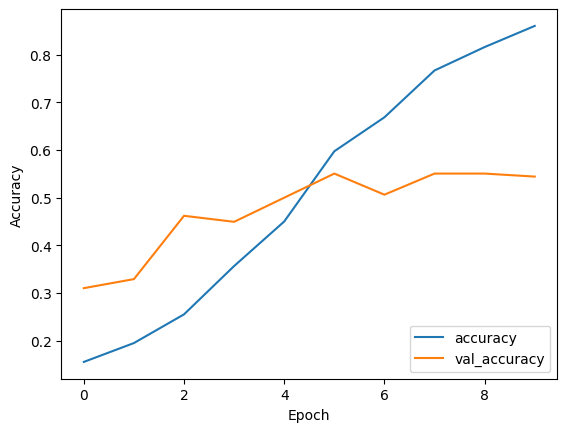

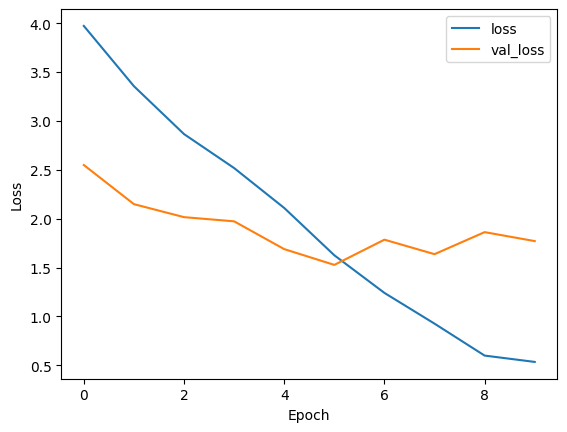

In [12]:
# Train the model
history = model.fit(images, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [13]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(images, labels, verbose=0)
print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Training loss: {train_loss:.4f}')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(images, labels, verbose=0)
print(f'Validation accuracy: {val_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}')


Training accuracy: 0.8885
Training loss: 0.4544
Validation accuracy: 0.8885
Validation loss: 0.4544


In [14]:
# Save the model
model.save('number_plate_detection_model.h5')


In [16]:
# List the contents of the google_images folder
!ls dataset/google_images


 0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg
 0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.xml
 00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.jpg
 00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.xml
 018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.JPG
 018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.xml
 03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg
 03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.xml
 0369b20e-b432-4409-90f9-2420877aa386___8151536c79159a1557421da5f27f9f0e.jpg.jpeg
 0369b20e-b432-4409-90f9-2420877aa386___8151536c79159a1557421da5f27f9f0e.jpg.xml
 07064c2c-2aa3-4419-91a4-92916de8e54c___mahindra-scorpio-old-car-500x500.jpg.jpeg
 

In [17]:
# Function to load and preprocess an image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Load a sample image (replace 'your_correct_image_filename.jpg' with the correct image path)
image_path = 'dataset/google_images/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg'
image = load_image(image_path)

# Make a prediction
prediction = model.predict(image)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

# Display the result
print(f'Predicted Label: {predicted_label[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
Predicted Label: car-wbs-GJ05JH2501
